# <b>imshow</b>

This section describes various options available for imshow plots in **fivecentplots**

See the full API https://endangeredoxen.github.io/fivecentplots/0.6.0/api/imshow.html#imshow

## Setup

Import packages:

In [3]:
import fivecentplots as fcp
import pandas as pd
from pathlib import Path
import cv2
import itertools

Load a completely ridiculous 8-bit RGB color test image as a `np.array`:

In [4]:
img_rgb = cv2.imread(str(Path(fcp.__file__).parent / 'test_data/imshow_cat_pirate.png'))
img_rgb

array([[[223, 221, 220],
        [223, 221, 220],
        [223, 221, 220],
        ...,
        [222, 220, 219],
        [222, 220, 219],
        [222, 220, 219]],

       [[223, 221, 220],
        [223, 221, 220],
        [223, 221, 220],
        ...,
        [222, 220, 219],
        [222, 220, 219],
        [222, 220, 219]],

       [[223, 221, 220],
        [223, 221, 220],
        [223, 221, 220],
        ...,
        [222, 220, 219],
        [222, 220, 219],
        [222, 220, 219]],

       ...,

       [[ 86,  95, 108],
        [ 84,  93, 106],
        [ 81,  90, 103],
        ...,
        [210, 211, 209],
        [210, 211, 209],
        [210, 211, 209]],

       [[ 85,  94, 107],
        [ 83,  92, 105],
        [ 81,  90, 103],
        ...,
        [211, 212, 210],
        [211, 212, 210],
        [211, 212, 210]],

       [[ 84,  93, 106],
        [ 83,  92, 105],
        [ 81,  90, 103],
        ...,
        [211, 212, 210],
        [211, 212, 210],
        [211, 212, 210]]

## Input data format

<b>fivecentplots</b> was originally designed to simplify plotting from 2D `pandas.DataFrame`s.  However, this approach is not convenient or efficient for storing / displaying / processing image data, especially for color images with 3 or more channels of pixel data.  Starting with v0.6.0, <b>fivecentplots</b> adopts a new convention that is significantly faster, particularly when grouping across multiple images:

<br>
<b>Single images without any grouping labels</b>:
    
Image data is passed to the plotting function through the its first and only required `arg`
    
* Option 1 (recommended): image data is stored in `numpy` array &rarr; works with 2D grayscale/RAW image and RGBA color images (3 or 4 channels)

    ```
    img = imageio.imread('some_image_file.png')  # np.array
    fcp.imshow(img, **kwargs)
    ```

* Option 2: image data is stored in a 2D `pd.DataFrame` with interger labeled columns and integer labeled row indices &rarr; works for 2D grayscale/RAW only

    ```
    img = pd.DataFrame(imageio.imread('some_image_file.png'))  # pd.DataFrame
    fcp.imshow(img, **kwargs)
    ```
    
<br>    
<b>Multiple images with grouping labels</b>:

* Grouping label information:  
    
    * stored in a `pd.DataFrame`
    * each grouping label is a column in the `pd.DataFrame`
    * one row for each image
    * row index is a unique key / name / number that corresponds to the image data
    
* Image data:

    * stored as a dictionary of `np.array`s
    * each dictionary key matches a row index value for the grouping `pd.DataFrame`
    * dictionary is passed to special kwarg named `imgs`
    
Examples of both cases are provided below.  

In [4]:
df = pd.DataFrame({'alpha_blend': [1, 10, 50], 'gamma': [1, 2.2, 1.8]}, index=['img0', 'img1', 'img2'])
df

alpha_blend  gamma
img0            1    1.0
img1           10    2.2
img2           50    1.8

In [5]:
imgs = {'img0': imageio.imread(Path(fcp.__file__).parent / 'test_data/imshow_color_bars.png'), 
        'img1': (1.75 * imageio.imread(Path(fcp.__file__).parent / 'test_data/imshow_color_bars.png')).astype(np.uint8), 
        'img2': (0.15 * imageio.imread(Path(fcp.__file__).parent / 'test_data/imshow_color_bars.png')).astype(np.uint8)}
imgs

{'img0': array([[[254,   0,   0],
         [254,   0,   0],
         [254,   0,   0],
         ...,
         [254,   0, 246],
         [254,   0, 246],
         [254,   0, 246]],
 
        [[254,   0,   0],
         [254,   0,   0],
         [254,   0,   0],
         ...,
         [254,   0, 246],
         [254,   0, 246],
         [254,   0, 246]],
 
        [[254,   0,   0],
         [254,   0,   0],
         [254,   0,   0],
         ...,
         [254,   0, 246],
         [254,   0, 246],
         [254,   0, 246]],
 
        ...,
 
        [[254,   0,   0],
         [254,   0,   0],
         [254,   0,   0],
         ...,
         [254,   0, 246],
         [254,   0, 246],
         [254,   0, 246]],
 
        [[254,   0,   0],
         [254,   0,   0],
         [254,   0,   0],
         ...,
         [254,   0, 246],
         [254,   0, 246],
         [254,   0, 246]],
 
        [[254,   0,   0],
         [254,   0,   0],
         [254,   0,   0],
         ...,
         [254,   0, 

And the plot is executed as follows:

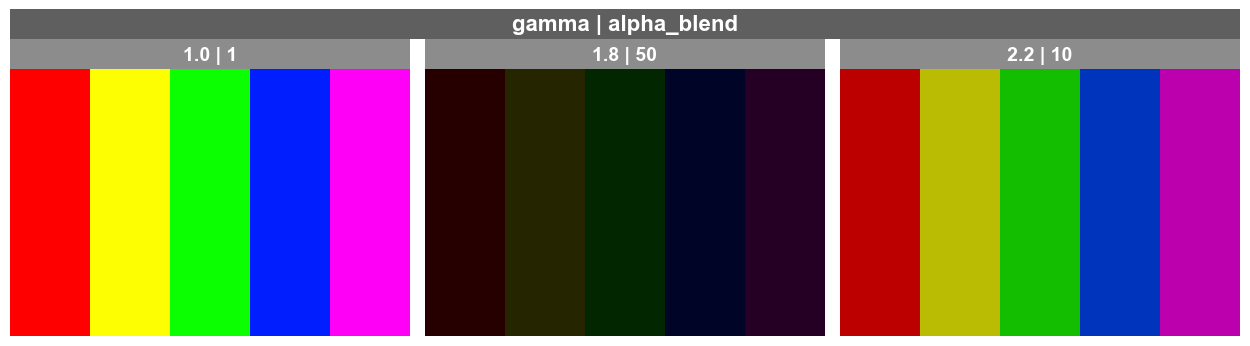

In [6]:
fcp.imshow(df, imgs=imgs, wrap=['gamma', 'alpha_blend'], ncol=3, ws_col=15)

## Basic image display

### RGB 

RGB data <b>must</b> be stored in a `numpy` array.  For a single image, it can be passed as the primary `arg` to the `imshow` plotting function, along with any other desired `kwargs` to fine tune the final result:

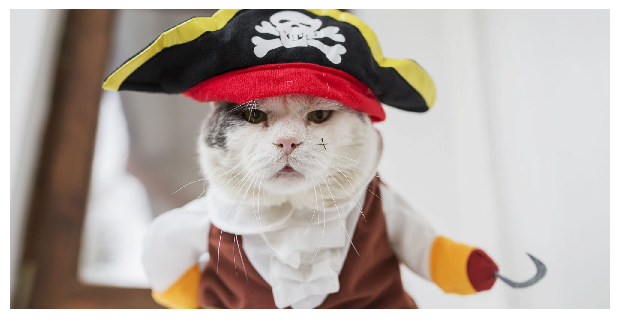

(1000, 2000, 3)

In [7]:
fcp.imshow(img_rgb, ax_size=[600, 600]) 
img_rgb.shape

..note:: 
* when specifying `ax_size` the aspect ratio of the original data will be preserved and the larger value between *actual* height or width will adopt the *specified* height or width
* tick labels are disable by default for `imshow` (use `tick_labels_major=True` to enable)

### RAW / Grayscale

<b>fivecentplots</b> can also be used to display 2D RAW/grayscale image data.  For this example, we first covert the above RGB image into a scaled 16-bit grayscale `pd.DataFrame` using an `fcp.utilities` functions:

In [8]:
img_raw = fcp.utilities.img_grayscale(img_rgb, as_df=True)
img_raw

0      1      2      3      4      5      6      7      8      9     \
0    56773  56773  56773  56773  56773  56773  56773  56773  56773  56773   
1    56773  56773  56773  56773  56773  56773  56773  56773  56516  56516   
2    56773  56773  56773  56773  56773  56773  56773  56773  56516  56516   
3    56773  56773  56773  56773  56773  56773  56773  56773  56516  56516   
4    56773  56773  56773  56773  56773  56773  56773  56773  56773  56773   
..     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
995  25661  24890  23862  23348  23183  22670  21642  20871  20555  20298   
996  25404  24633  23862  23348  23183  22413  21642  20871  20555  20298   
997  25147  24633  23862  23348  22926  22413  21642  21128  20555  20298   
998  24890  24376  23862  23091  22670  22156  21385  21128  20298  20041   
999  24633  24376  23862  23091  22670  22156  21385  21128  20298  20041   

     ...   1990   1991   1992   1993   1994   1995   1996   1997   1998   1999  
0    ...  56516  56516  56516  56516  56516  56516  56516  56516  56516  56516  
1    ...  56516  56516  56516  56516  56516  56516  56516  56516  56516  56516  
2    ...  56516  56516  56516  56516  56516  56516  56516  56516  56516  56516  
3    ...  56516  56516  56516  56516  56516  56516  56516  56516  56516  56516  
4    ...  56516  56516  56516  56516  56516  56516  56516  56516  56516  56516  
..   ...    ...    ...    ...    ...    ...    ...    ...    ...    ...    ...  
995  ...  54295  54295  54295  54295  54295  54295  54038  54038  54038  54038  
996  ...  54295  54295  54295  54295  54295  54295  54038  54038  54038  54038  
997  ...  54295  54295  54295  54295  54295  54295  54038  54038  54038  54038  
998  ...  54295  54295  54038  54038  54038  54038  54295  54295  54295  54295  
999  ...  54295  54295  54038  54038  54038  54038  54295  54295  54295  54295  

[1000 rows x 2000 columns]

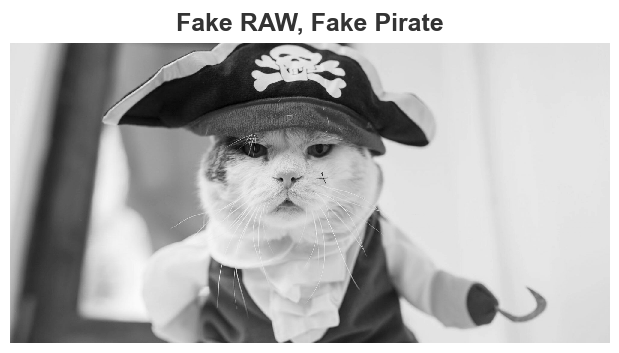

In [9]:
fcp.imshow(img_raw, ax_size=[600, 600], title='Fake RAW, Fake Pirate')

..note:: `imshow` uses the "gray" colormap by default for single-channel RAW images

## Colors

This section applies only to single-channel image data

### Color map

We can add any standard color map from matplotlib to an image using keyword `cmap`:

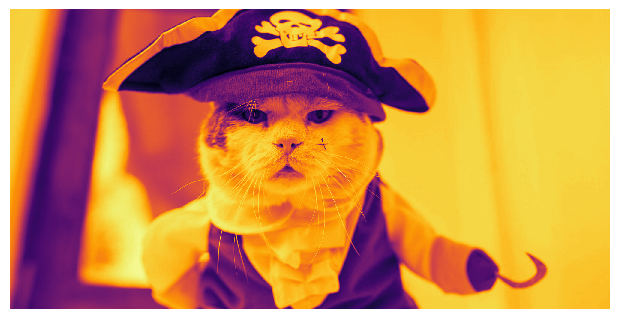

In [10]:
fcp.imshow(img_raw, cmap='inferno', ax_size=[600, 600])

### Colorbar

We can also add a colorbar to the image showing the z-range with the keyword `cbar=True`

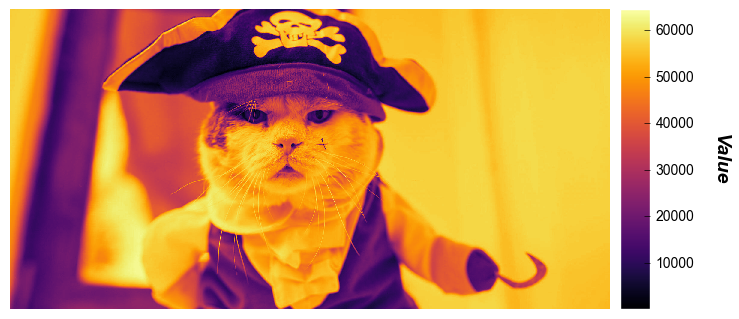

In [11]:
fcp.imshow(img_raw, cmap='inferno', ax_size=[600, 600], cbar=True)

## Cropping

For both single and multi-channel images, we can crop (i.e., zoom in) the image by applying `x` and `y` limits.  Note:

* `x` applies to the image columns
* `y` applies to the image rows
* image data follows the common convention of starting with "row 0" at the top of the image &rarr; `y` values increase from top to bottom

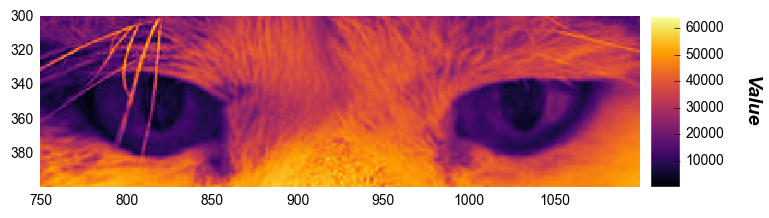

In [12]:
fcp.imshow(img_raw, cmap='inferno', cbar=True, ax_size=[600, 600], xmin=750, xmax=1100, ymin=300, ymax=400, tick_labels_major=True)

..caution::
Private eyes

They're watching you

They see your every move

Zooming can be achieved by changing the `ax_size` values for the cropped image.  We can also add axes labels:

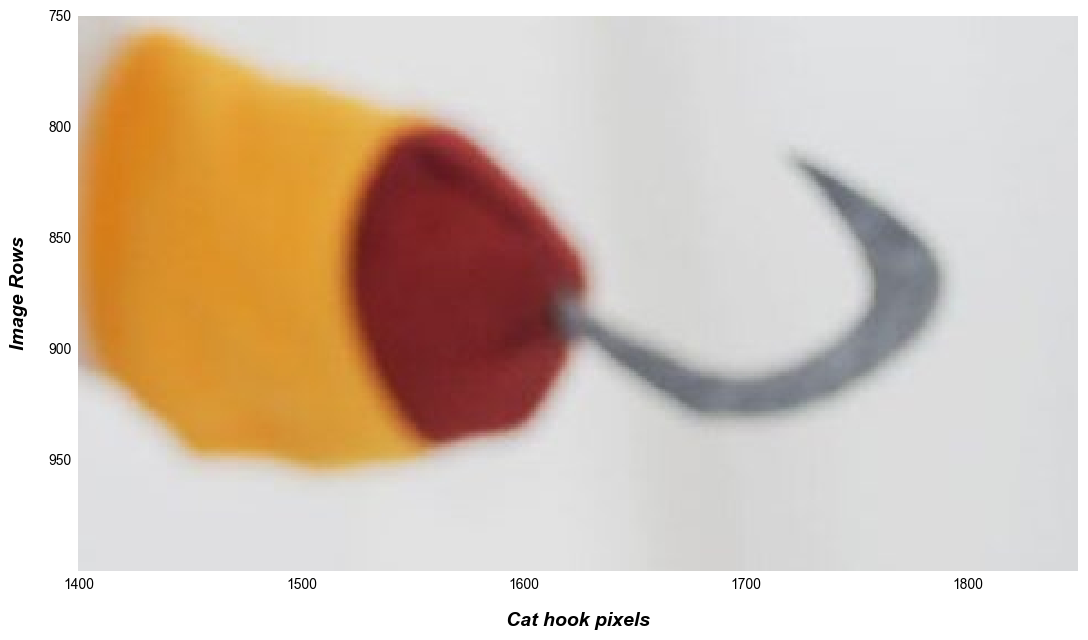

In [13]:
fcp.imshow(img_rgb, ax_size=[1000, 600], xmin=1400, xmax=1850, ymin=750, ymax=2E20, tick_labels_major=True, label_x='Cat hook pixels', label_y='Image Rows')

..note:: If a crop limit exceeds the actual dimensions of the image, the min or max value is automatically used instead

## Contrast stretching

This section applies only to single-channel image data
<br><br>

In some cases (such as RAW image sensor data analysis) it is helpful to adjust the colormap limits in order to "stretch" the contrast.  This can be done via the `z` axis limits.  In this example, we stretch +/-3 standard deviations from the mean pixel value.

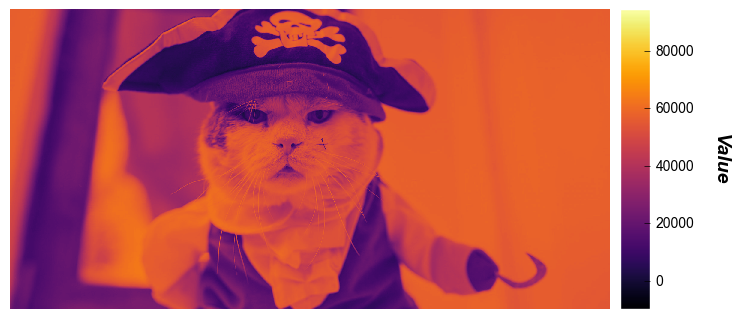

In [14]:
# First calculate the mean and std to help define stretching limits
uu = img_raw.stack().mean()
ss = img_raw.stack().std()

# Plot with stretching
fcp.imshow(img_raw, cmap='inferno', cbar=True, ax_size=[600, 600], zmin=uu-3*ss, zmax=uu+3*ss)

imshow plots in <b>fivecentplots</b> also provides a convenient kwarg called `stretch` which calculates a numerical multiplier of the standard deviation above and below the mean to set new z-limits (the same thing that was done manually above).  `stretch` can be a single value of std dev which is interpreted as +/- that value or a 2-value list with the lower and higher std deviation respectively.  First, we consider a +/- 4 sigma stretch as above:

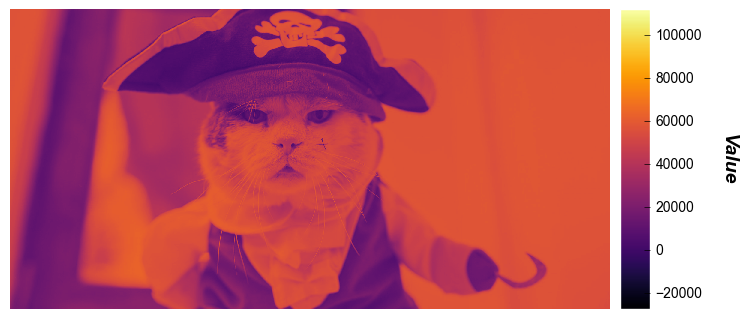

In [15]:
fcp.imshow(img_raw, cmap='inferno', cbar=True, ax_size=[600, 600], stretch=4)

Now we show a single-sided stretch that applies a 3 * std dev increase to the upper z-limit:

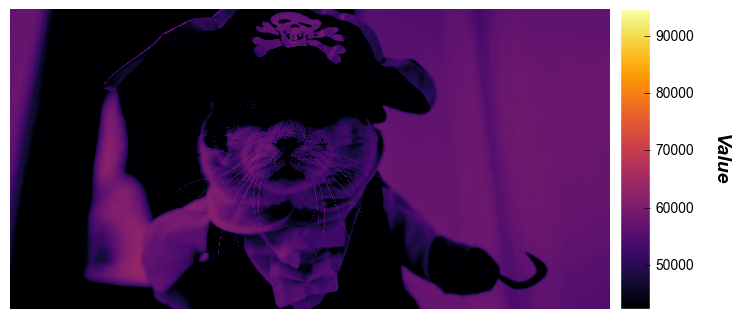

In [16]:
fcp.imshow(img_raw, cmap='inferno', cbar=True, ax_size=[600, 600], stretch=[0, 3])

## Width/Height Ratio

By default, <b>fivecentplots</b> will preserve the width to height ratio of the original image.  However, this can be overriden if desired via the keyward `wh_ratio`:

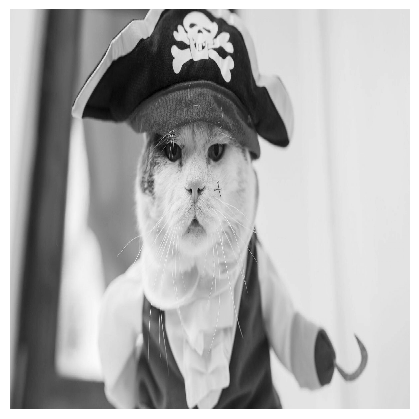

In [17]:
fcp.imshow(img_raw, wh_ratio=1)

## Split color planes

This section applies only to single-channel image data
<br><br>

When analyzing Bayer-type images, it is often useful to split the image data based on the color-filter array pattern used on the image sensor.  <b>fivecentplots</b> provides a simple utility function to do this and `imshow` can be used to display the result.  Consider the following image:

<img align="left" src="https://upload.wikimedia.org/wikipedia/commons/2/28/RGB_illumination.jpg">

First we read the image from the world-wide web and convert into a Bayer-like RAW image (rough hack for the purposes of this example):

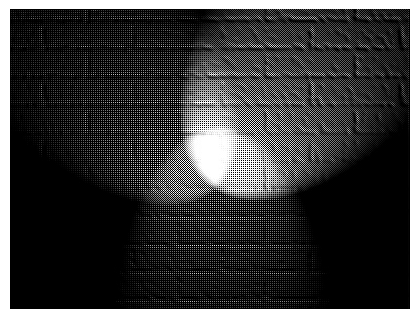

array([[ 0,  0,  0, ..., 34,  1,  1],
       [ 0, 32,  0, ...,  2, 67,  0],
       [ 0,  0,  0, ..., 36,  1,  0],
       ...,
       [ 0,  0,  0, ...,  0,  7,  0],
       [ 0,  0,  0, ...,  0,  7,  0],
       [ 0,  0,  0, ...,  0,  7,  0]], dtype=uint8)

In [18]:
url = 'https://upload.wikimedia.org/wikipedia/commons/2/28/RGB_illumination.jpg'
img_rgb_sp = imageio.imread(url)
img_raw_sp = fcp.utilities.rgb2bayer(img_rgb_sp)
fcp.imshow(img_raw_sp) 
img_raw_sp

`fcp.imshow` has a built-in hook to separate RAW single-channel data into discrete color planes if the CFA pattern of the RAW data is supplied with the keyword `cfa`.  This automatically creates a new grouping column for the data called "Plane", which was can use to separate the color planes into discrete subplots for visualization.  

..note:: Only CFAs with a 2x2 grid of colors is supported

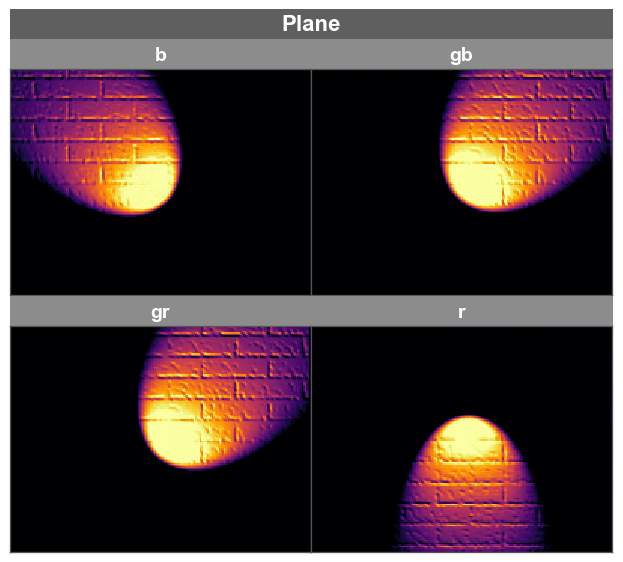

In [19]:
fcp.imshow(img_raw_sp, cmap='inferno', ax_size=[300, 300], cfa='rggb', wrap='Plane', ax_edge_width=1, ax_edge_color='#555555')

## Grouped Images

As explained in <a href="#input-data-format">Section 2</a>, to enable the powerful grouping / filtering / automatic-color-plane-splitting functionality of <b>fivecentplots</b> for sets of multiple images in an efficient manner, we cannot rely only on `pd.DataFrame`s.  Instead, we use simple `pd.DataFrame`s for unique grouping information only and use a dictionary of `np.array`s to store the actual image data. 

### Simple grouping example

Let's create a simple side-by-side of our beloved pirate cat with the same image's inverse.  First, we create a `pd.DataFrame` with a basic text label to distinguish the two "cases" and a numeric index:

In [20]:
df = pd.DataFrame({'case': ['this is Gary', 'this is inverse Gary']}, index=[0, 1])
df

case
0          this is Gary
1  this is inverse Gary

Next, we make a dictionary with two entries: (1) the original image and (2) the inverse image.  Remember, that the dictionary keys must match the row indices of our `df` above:

In [21]:
imgs = {}
imgs[0] = img_rgb
imgs[1] = ((1 - img_rgb / 255) * 255).astype(np.uint16)
imgs

{0: array([[[220, 221, 223],
         [220, 221, 223],
         [220, 221, 223],
         ...,
         [219, 220, 222],
         [219, 220, 222],
         [219, 220, 222]],
 
        [[220, 221, 223],
         [220, 221, 223],
         [220, 221, 223],
         ...,
         [219, 220, 222],
         [219, 220, 222],
         [219, 220, 222]],
 
        [[220, 221, 223],
         [220, 221, 223],
         [220, 221, 223],
         ...,
         [219, 220, 222],
         [219, 220, 222],
         [219, 220, 222]],
 
        ...,
 
        [[108,  95,  86],
         [106,  93,  84],
         [103,  90,  81],
         ...,
         [209, 211, 210],
         [209, 211, 210],
         [209, 211, 210]],
 
        [[107,  94,  85],
         [105,  92,  83],
         [103,  90,  81],
         ...,
         [210, 212, 211],
         [210, 212, 211],
         [210, 212, 211]],
 
        [[106,  93,  84],
         [105,  92,  83],
         [103,  90,  81],
         ...,
         [210, 212, 211],

Now we plot.  Pass the grouping label `pd.DataFrame` as the primary `arg` to `fcp.imshow` and the dictionary to the special `kwarg` called `imgs`:

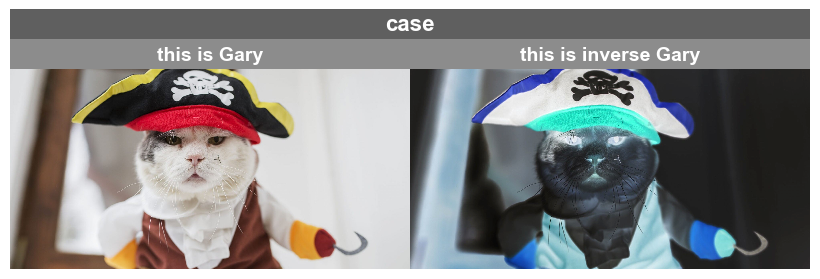

In [22]:
fcp.imshow(df, imgs=imgs, wrap='case')

### More advanced example

Let's consider a more complicated example with multiple grouping factors using an ISO 12233 eSFR chart:

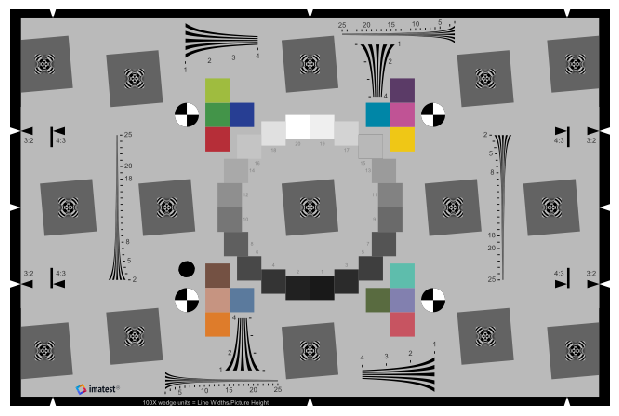

In [23]:
base_img = imageio.imread('https://www.imatest.com/wp-content/uploads/2011/11/new_ISO-12233_enh_wedges_3_2_sRGB.png')[12:-12, 15:-15, 0:3]
fcp.imshow(base_img, ax_size=[600, 600])

Now we apply various combinations of Gaussian blur, random noise, and gain to the base image.  For each iteration of our processing loop, we need to do two things:

1. `pd.concat` a new row containing the `kernel`, `sigma`, and `gain` values.  Initially, we ignore the row index but after the loop we use `df.reset_index()` to make a numerical index for each row
2. transform the base image and store the result in an `imgs` dictionary with a numerical key

which yields a data set of 32 images for plotting with `imshow`.  

<br>
<p><i>Although the specifics of this example are a bit silly, one can readily see the power of</i> <b>fivecentplots</b> <i>for analyzing complex image processing experiments.</i></p>

In [24]:
df = pd.DataFrame()
imgs = {}
for (kernel, sigma, gain) in itertools.product([1, 3, 5, 7], [0, 0.5, 1, 2], [0.5, 1]):
    df = pd.concat([df, pd.DataFrame({'kernel': kernel, 'sigma': sigma, 'gain': gain}, index=[0])])
    noise = np.random.normal(0, sigma, base_img.shape)
    imgs[len(imgs)] = cv2.GaussianBlur((base_img * gain + noise).astype(np.uint8), (kernel, kernel), 0)
df = df.reset_index()
df

index  kernel  sigma  gain
0       0       1    0.0   0.5
1       0       1    0.0   1.0
2       0       1    0.5   0.5
3       0       1    0.5   1.0
4       0       1    1.0   0.5
5       0       1    1.0   1.0
6       0       1    2.0   0.5
7       0       1    2.0   1.0
8       0       3    0.0   0.5
9       0       3    0.0   1.0
10      0       3    0.5   0.5
11      0       3    0.5   1.0
12      0       3    1.0   0.5
13      0       3    1.0   1.0
14      0       3    2.0   0.5
15      0       3    2.0   1.0
16      0       5    0.0   0.5
17      0       5    0.0   1.0
18      0       5    0.5   0.5
19      0       5    0.5   1.0
20      0       5    1.0   0.5
21      0       5    1.0   1.0
22      0       5    2.0   0.5
23      0       5    2.0   1.0
24      0       7    0.0   0.5
25      0       7    0.0   1.0
26      0       7    0.5   0.5
27      0       7    0.5   1.0
28      0       7    1.0   0.5
29      0       7    1.0   1.0
30      0       7    2.0   0.5
31      0       7    2.0   1.0

First, we plot all combinations using the `kernel` value for each column of images, the `sigma` value for each row of images, and `gain` as the sole entry in `fig_groups` which yields a separate plot for each `gain` value.  Notice that the saved filename is printed above each plot, designating the `gain` value used.

Row by sigma by kernel where gain=0.5.png


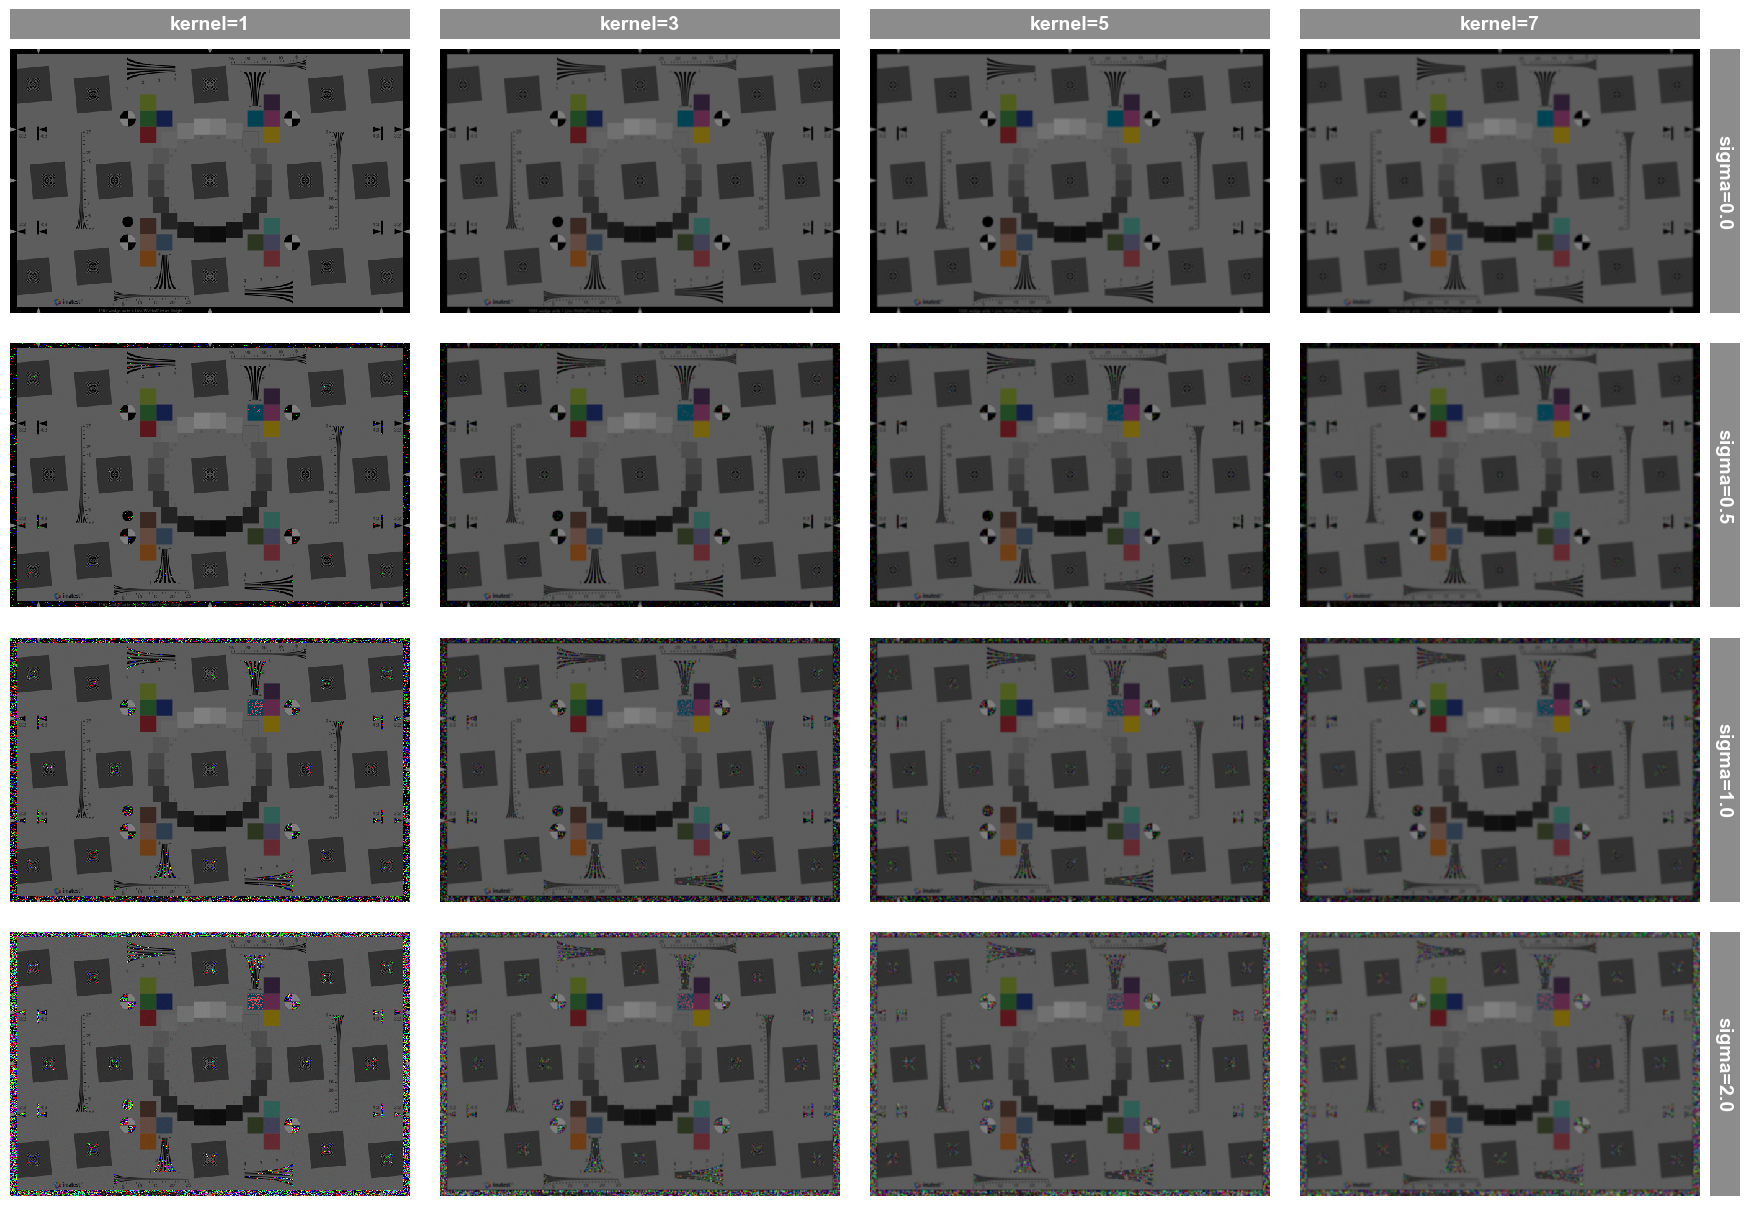

Row by sigma by kernel where gain=1.0.png


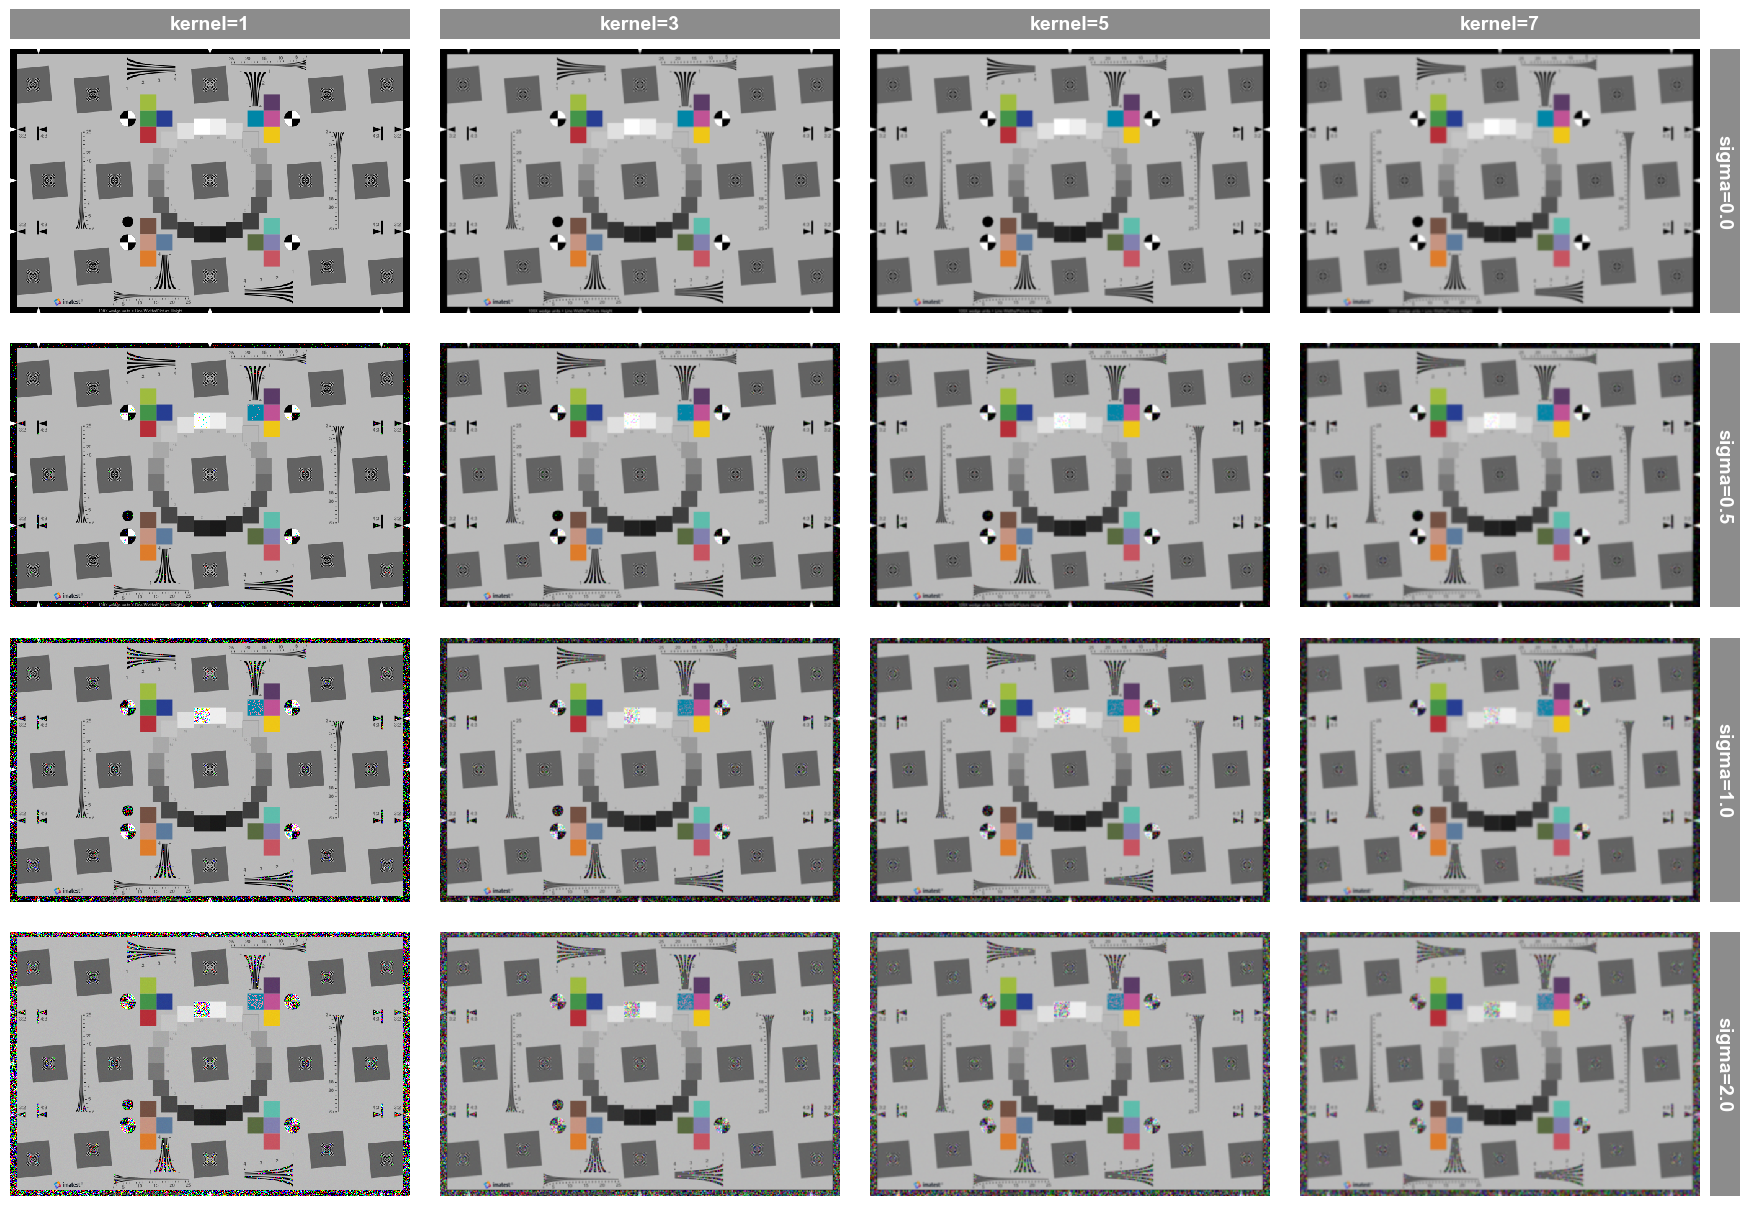

In [25]:
fcp.imshow(df, imgs=imgs, col='kernel', row='sigma', fig_groups='gain', print_filename=True)

Let's say we are interested in down selecting to only a few cases and zooming in to see the result.  This can be accomplished as follows:

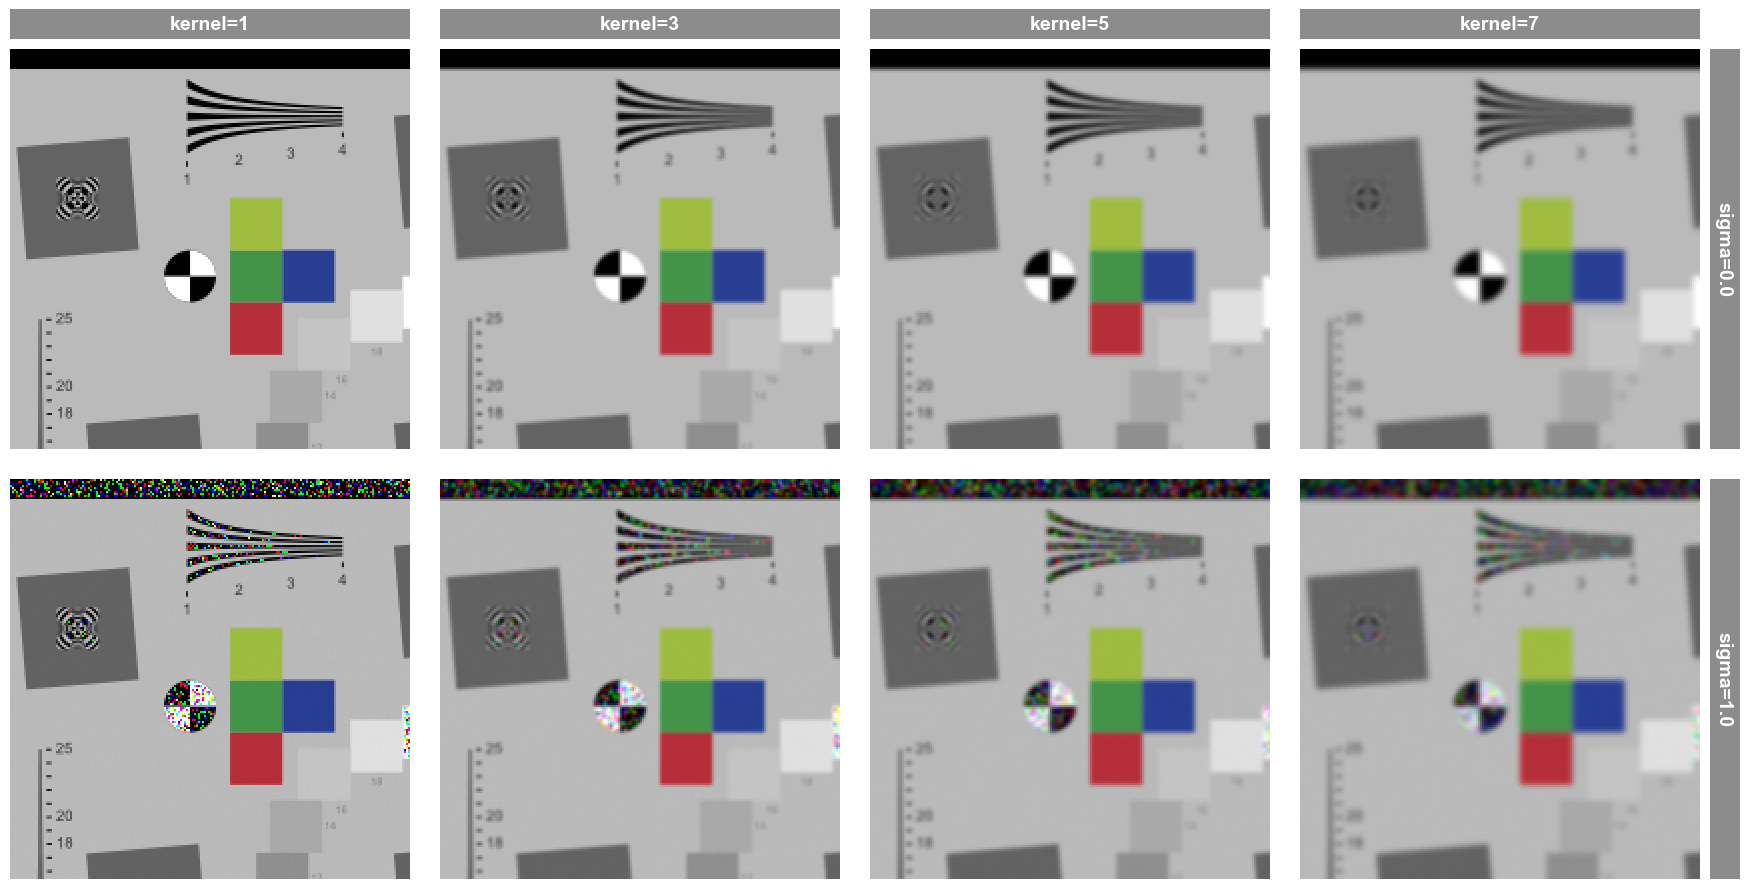

In [26]:
fcp.imshow(df, imgs=imgs, col='kernel', row='sigma', filter='gain==1 & kernel < 9 & sigma in [0, 1]', xmin=100, xmax=300, ymax=200)

..note:: The above images are zoomed in automatically because our crop dimensions are smaller than the default value for `ax_size=[400, 400]`

## Pixel accuracy

The importance of pixel accuracy when rendering images through `fcp.imshow` depends on the application.  In some cases, we may specifically not want pixel accuracy as it can make the rendered image quality look poor and pixelated. This section describes the options available to address this issue within <b>fivecentplots</b>.

### Preserving pixel values

Let's create a very basic checkerboard image with only two pixel values, 0 and 255:

In [27]:
n = 40
checkerboard = np.tile(np.array([[0, 255], [255, 0]]), (n//2, n//2))
checkerboard

array([[  0, 255,   0, ..., 255,   0, 255],
       [255,   0, 255, ...,   0, 255,   0],
       [  0, 255,   0, ..., 255,   0, 255],
       ...,
       [255,   0, 255, ...,   0, 255,   0],
       [  0, 255,   0, ..., 255,   0, 255],
       [255,   0, 255, ...,   0, 255,   0]])

<b>fivecentplots</b> will accurately display this pattern if the `ax_size` keyword matches the array size:

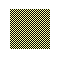

In [28]:
fcp.imshow(checkerboard, ax_size=checkerboard.shape, cmap='inferno')

This is hard to visualize, but fortunately, we can size up the image and still preserve the pixel pattern:

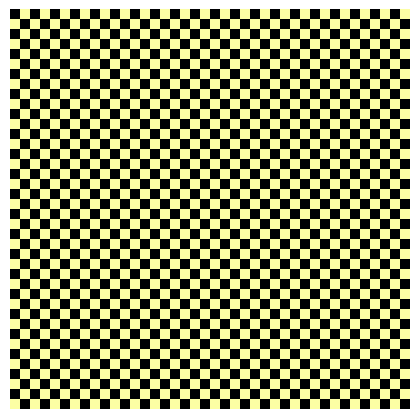

In [29]:
fcp.imshow(checkerboard, ax_size=[400, 400], cmap='inferno')

### Downsampling

If the requested `ax_size` is smaller than the image array size, the plotting backend (in this case `matplotlib`) performs some downscaling which means the resulting image is no longer pixel accurate:

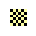

In [30]:
fcp.imshow(checkerboard, ax_size=[17, 17], cmap='inferno')

The above image is small but careful inspection shows that the black squares are not uniformly sized.  We can illustrate this better by saving the images and reading them back, stripping off the plot figure border, and converting to grayscale:

In [31]:
fcp.imshow(checkerboard, ax_size=[40, 40], cmap='inferno', filename='checkerboard_40.png', inline=False, save=True)
fcp.imshow(checkerboard, ax_size=[17, 17], cmap='inferno', filename='checkerboard_17.png', inline=False, save=True)
checkerboard_40 = fcp.utl.img_grayscale(imageio.imread('checkerboard_40.png')[10:-10, 10:-10], bit_depth=8)
checkerboard_17 = fcp.utl.img_grayscale(imageio.imread('checkerboard_17.png')[10:-10, 10:-10], bit_depth=8)

The original image:

In [32]:
checkerboard_40

array([[  0, 243,   0, ..., 243,   0, 243],
       [243,   0, 243, ...,   0, 243,   0],
       [  0, 243,   0, ..., 243,   0, 243],
       ...,
       [243,   0, 243, ...,   0, 243,   0],
       [  0, 243,   0, ..., 243,   0, 243],
       [243,   0, 243, ...,   0, 243,   0]], dtype=uint16)

And the shrunk image:

In [33]:
checkerboard_17

array([[  0,   0,   0, 243, 243, 243,   0,   0, 243, 243, 243,   0,   0,
          0, 243, 243, 243],
       [  0,   0,   0, 243, 243, 243,   0,   0, 243, 243, 243,   0,   0,
          0, 243, 243, 243],
       [  0,   0,   0, 243, 243, 243,   0,   0, 243, 243, 243,   0,   0,
          0, 243, 243, 243],
       [243, 243, 243,   0,   0,   0, 243, 243,   0,   0,   0, 243, 243,
        243,   0,   0,   0],
       [243, 243, 243,   0,   0,   0, 243, 243,   0,   0,   0, 243, 243,
        243,   0,   0,   0],
       [243, 243, 243,   0,   0,   0, 243, 243,   0,   0,   0, 243, 243,
        243,   0,   0,   0],
       [  0,   0,   0, 243, 243, 243,   0,   0, 243, 243, 243,   0,   0,
          0, 243, 243, 243],
       [  0,   0,   0, 243, 243, 243,   0,   0, 243, 243, 243,   0,   0,
          0, 243, 243, 243],
       [243, 243, 243,   0,   0,   0, 243, 243,   0,   0,   0, 243, 243,
        243,   0,   0,   0],
       [243, 243, 243,   0,   0,   0, 243, 243,   0,   0,   0, 243, 243,
        2

### Interpolation

With the `matplotlib` engine, <b>fivecentplots</b> supports any of the available <a href="https://matplotlib.org/stable/gallery/images_contours_and_fields/interpolation_methods.html">interpolation schemes</a> via the keyword `interp`.  Here is our checkboard with a terrifically named interpolation scheme:

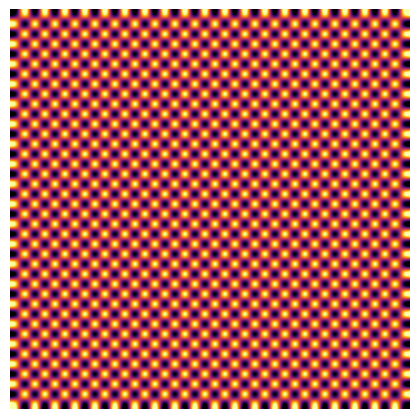

In [34]:
fcp.imshow(checkerboard, ax_size=[400, 400], cmap='inferno', interp='catrom')

..note:: Interpolation can be helpful when plotting high-resolution color images that look pixelated